In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# converting y train into a 1 D array insted of 2D
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)


In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
import matplotlib.pyplot as plt


In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

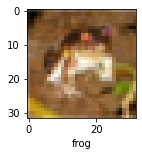

In [13]:
plot_sample(X_train, y_train, 0)


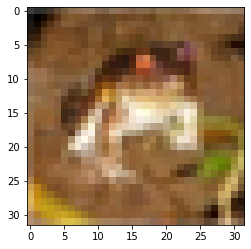

In [14]:
plt.imshow(X_train[0])

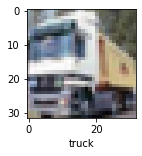

In [15]:
plot_sample(X_train, y_train, 1)


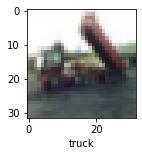

In [16]:
plot_sample(X_train, y_train, 2)


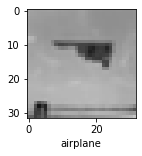

In [17]:
plot_sample(X_train, y_train, 4353)


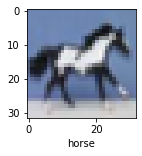

In [18]:
plot_sample(X_train, y_train, 10735)


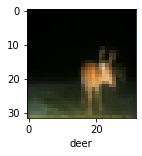

In [19]:
plot_sample(X_train, y_train, 4400)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [20]:
# Normalising the training data 
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**


In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 106s 67ms/step - loss: 1.8134 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6251 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5421 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4829 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4321 - accuracy: 0.4973


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.44      0.49      1000
           1       0.53      0.66      0.59      1000
           2       0.43      0.25      0.32      1000
           3       0.34      0.39      0.36      1000
           4       0.44      0.40      0.42      1000
           5       0.50      0.21      0.29      1000
           6       0.46      0.66      0.54      1000
           7       0.70      0.40      0.51      1000
           8       0.41      0.81      0.55      1000
           9       0.52      0.49      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



Now let us build a convolutional neural network to train our images


In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4645 - accuracy: 0.4742
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1109 - accuracy: 0.6110
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9943 - accuracy: 0.6515
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9121 - accuracy: 0.6821
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8482 - accuracy: 0.7046
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7971 - accuracy: 0.7219
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7454 - accuracy: 0.7396
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7028 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6621 - accuracy: 0.7669
Epoch 10/10
1563/1563 [==============================] - 68s 44m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [26]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 5s 14ms/step - loss: 0.9107 - accuracy: 0.6976


[0.9107008576393127, 0.6976000070571899]

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 14ms/step


array([[3.6488406e-04, 8.4728247e-04, 1.0674327e-03, 8.5316062e-01,
        3.9575811e-04, 1.3129821e-01, 3.1294043e-03, 7.6955883e-05,
        7.0441752e-03, 2.6151778e-03],
       [1.1828184e-03, 1.2131060e-02, 5.7785462e-07, 2.5305849e-07,
        1.0339812e-07, 9.0465013e-09, 2.6785284e-07, 4.0524359e-08,
        9.8661083e-01, 7.4071671e-05],
       [2.8329122e-01, 2.3324005e-01, 2.5105402e-03, 4.2280667e-03,
        1.1394250e-03, 5.2567455e-04, 8.4814453e-04, 1.3191835e-03,
        4.2652330e-01, 4.6374373e-02],
       [4.7661337e-01, 7.5853509e-03, 4.6546254e-02, 2.2930901e-03,
        1.2827727e-03, 8.4595413e-06, 6.0274226e-05, 9.8039500e-06,
        4.6512684e-01, 4.7382616e-04],
       [6.1403438e-07, 4.0077333e-07, 3.2137062e-02, 5.4589193e-03,
        4.8859900e-01, 4.8795986e-04, 4.7331038e-01, 2.2192803e-06,
        3.3627848e-06, 7.3673831e-08]], dtype=float32)

In [28]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

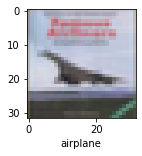

In [29]:
plot_sample(X_test, y_test,3)


In [41]:
classes[9]


'truck'

In [43]:
classes[y_train[3]]

'deer'

In [44]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']